In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from collections import OrderedDict

In [2]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv')

In [3]:
# get indexes of non-US rows
indexNames = df[ df['Country/Region'] != 'US' ].index

# drop non-US rows
df.drop(indexNames , inplace=True)

In [4]:
# drop Country/Region & GPS columns
df = df.drop(columns=['Country/Region', 'Lat','Long'])

In [5]:
# import county to state mapping
reader = csv.DictReader(open('county_conversion.csv', 'r', encoding='utf-8-sig'))
county_dict = {}
for line in reader:
    county_dict[line['county']] = line['state']

In [6]:
# transpose data frame
df2 = df.set_index('Province/State').T

In [7]:
# drop cruise ships
df2 = df2.drop(columns=['Diamond Princess', 'Grand Princess'])

In [8]:
# merge county data into states
for col in df2:
    if col in county_dict:
        state = county_dict[col]
        # add county data to relevant state
        df2[state] = df2[state] + df2[col]

# for testing
#df2.to_csv('county_testing.csv')

In [9]:
# drop county columns
for col in df2:
    if col in county_dict:
        df2 = df2.drop(columns=[col])

In [10]:
df2['United States'] = df2.sum(axis=1)
df2.to_csv('USA_cleaned.csv')

In [22]:
df2.head()

Province/State,Washington,New York,California,Massachusetts,Georgia,Colorado,Florida,New Jersey,Oregon,Texas,...,South Dakota,West Virginia,Wyoming,"Washington, D.C.",Alabama,Puerto Rico,Guam,Virgin Islands,United States,Italy
1/22/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1/23/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1/24/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1/25/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1/26/20,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


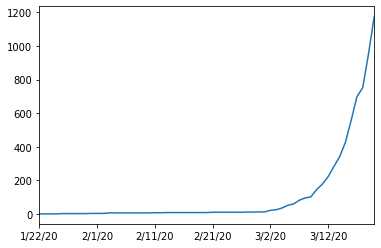

In [11]:
df2['California'].plot(kind='line')
plt.show()

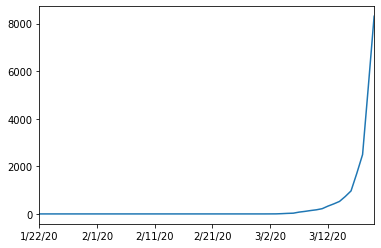

In [12]:
df2['New York'].plot(kind='line')
plt.show()

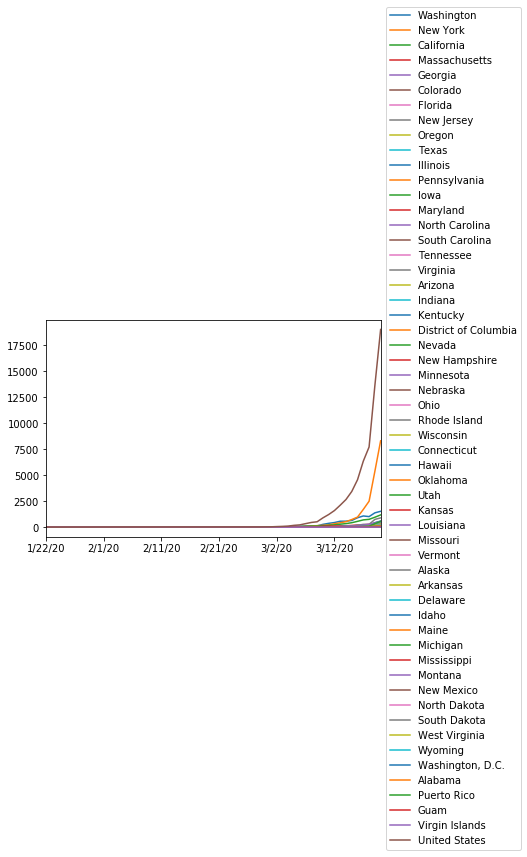

In [13]:
df2.plot(kind='line')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Italy Section

In [14]:
df_it = pd.read_csv('time_series_19-covid-Confirmed.csv')

In [15]:
# get indexes of non-Italy rows
indexNames = df_it[ df_it['Country/Region'] != 'Italy' ].index

# drop non-Italy rows
df_it.drop(indexNames , inplace=True)

# drop Country/Region & GPS columns
df_it = df_it.drop(columns=['Province/State', 'Lat','Long'])

# transpose data frame
df2_it = df_it.set_index('Country/Region').T

In [16]:
df2['Italy'] = df2_it['Italy']
df2.to_csv('USA_ITA_cleaned.csv')

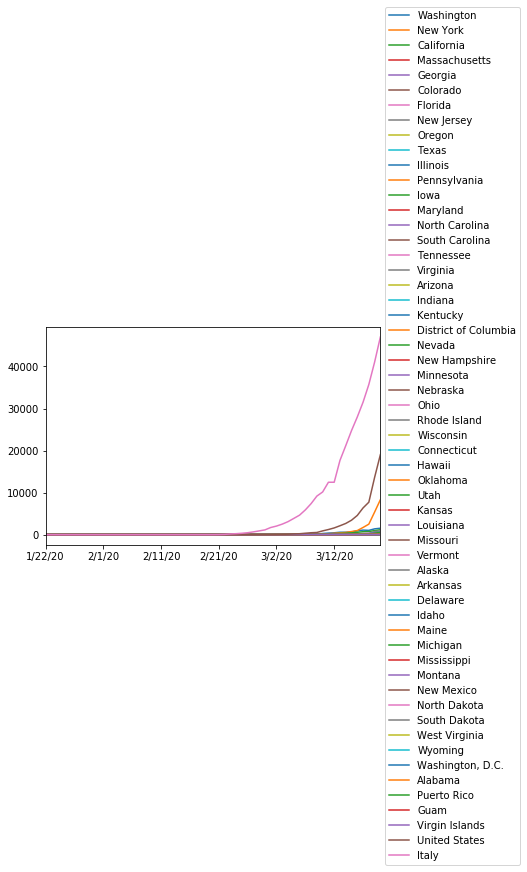

In [17]:
df2.plot(kind='line')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Population Section

In [18]:
dfp = pd.read_csv('nst-est2019-alldata.csv')

In [19]:
dfp2 = dfp[['NAME', 'POPESTIMATE2019']].copy()
df2.to_csv('population_data_cleaned.csv')

In [20]:
dfp2t = dfp2.set_index('NAME').T
dfp2t = dfp2t.drop(columns=['Northeast Region', 'Midwest Region', 'South Region', 'West Region'])
dfp2t['total'] = dfp2t.sum(axis=1)
dfp2t.to_csv('population_data_cleaned_trans.csv')

In [21]:
dfp2t.head()

NAME,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico,total
POPESTIMATE2019,328239523,4903185,731545,7278717,3017804,39512223,5758736,3565287,973764,705749,...,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759,3193694,659672740
